In [266]:
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
#loop if needed
Time = 100000
Ntime = Time + 1
time_s = np.linspace(0, Ntime, num=Ntime, endpoint=False)
#Random
array = np.random.rand(Ntime) 
rand_p1K=0.1*(array*2. - 1.)
data_p1K=20.+rand_p1K
#Normal Distribution
mean = 0
stdp1 = 0.022
Normalp1 = np.random.normal(mean, stdp1, size=Ntime)
Ndata_p1K=20.+Normalp1
#Gamma Dist
shape, scale = 0.02, 0.1 # mean and width
rng = np.random.default_rng()
Gammap1 = rng.standard_gamma(shape, Ntime)
Gdata_p1K=19.5+Gammap1
print("time (s) : ", time_s)
print("Data with 0.1K random noise (K) : ", data_p1K)
print("Data with 0.1K gamma noise (K) : ", Gdata_p1K)

time (s) :  [0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]
Data with 0.1K random noise (K) :  [19.90251786 20.08875654 20.02041939 ... 19.92171059 20.08406354
 19.90542811]
Data with 0.1K gamma noise (K) :  [19.50000004 19.5        19.5000973  ... 19.5        19.5
 19.5       ]


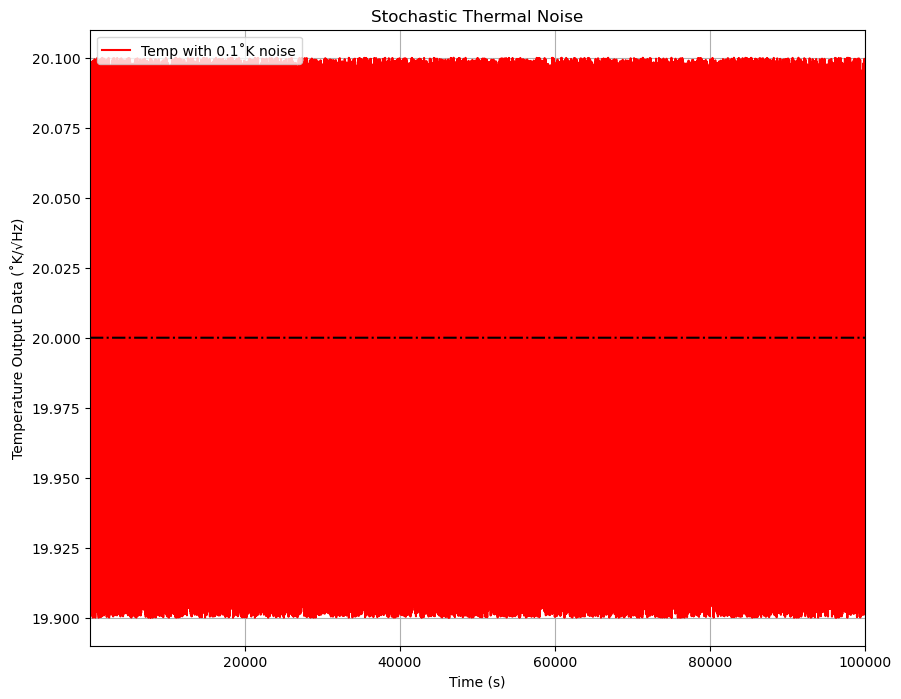

In [267]:
plt.figure(figsize=(10,8))
plt.plot(time_s, data_p1K, 'r-',label = "Temp with 0.1˚K noise")
plt.xlim(1, Time)
plt.title("Stochastic Thermal Noise")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.legend()
plt.plot(time_s,np.ones(np.shape(time_s))*20,'k-.')
plt.grid(visible=None, which='major', axis='both')
plt.show()

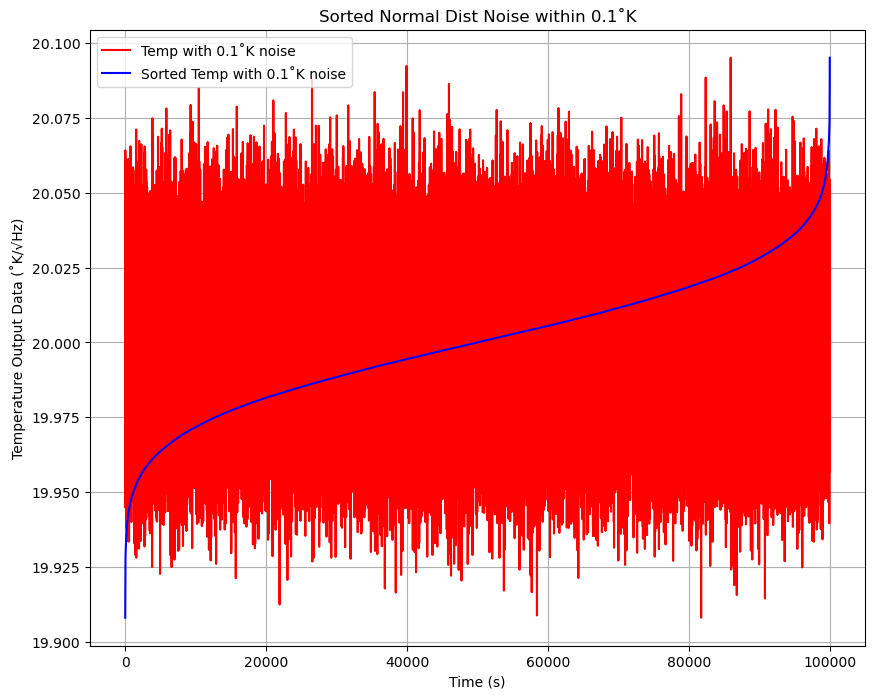

In [268]:
#Sort 0.1K Normal Dist data
AbNp1K = np.abs(Ndata_p1K)
ShNp1K = np.sort(AbNp1K)
plt.figure(figsize=(10,8))
plt.plot(time_s, AbNp1K, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, ShNp1K, 'b-',label = "Sorted Temp with 0.1˚K noise")
plt.title("Sorted Normal Dist Noise within 0.1˚K")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.grid('on')
plt.legend()

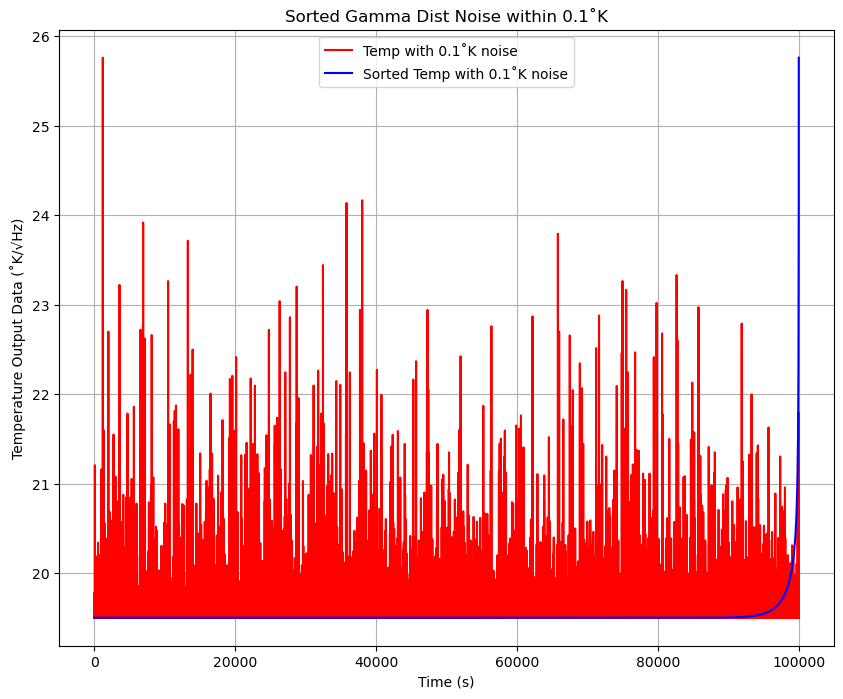

In [269]:
#Sort 0.1K Gamma Dist data
AbGp1K = np.abs(Gdata_p1K)
ShGp1K = np.sort(AbGp1K)
plt.figure(figsize=(10,8))
plt.plot(time_s, AbGp1K, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, ShGp1K, 'b-',label = "Sorted Temp with 0.1˚K noise")
plt.title("Sorted Gamma Dist Noise within 0.1˚K")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.grid('on')
plt.legend()

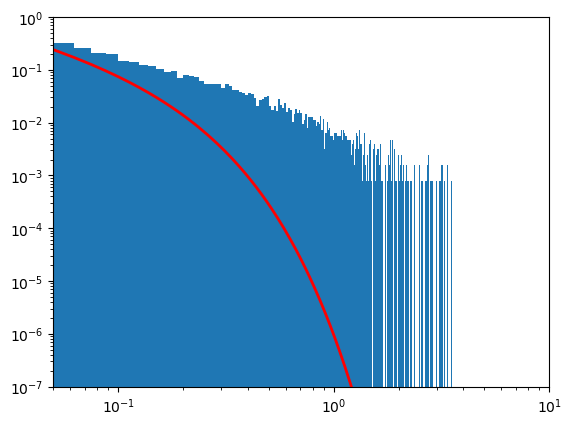

In [273]:
import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, _ = plt.hist(Gammap1, 500, density=True)
y = bins**(shape-1) * ((np.exp(-bins/scale))/  
                      (sps.gamma(shape) * scale**shape))
plt.plot(bins, y, linewidth=2, color='r') 
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.05, 10)
plt.ylim(1e-7, 1)
plt.show()

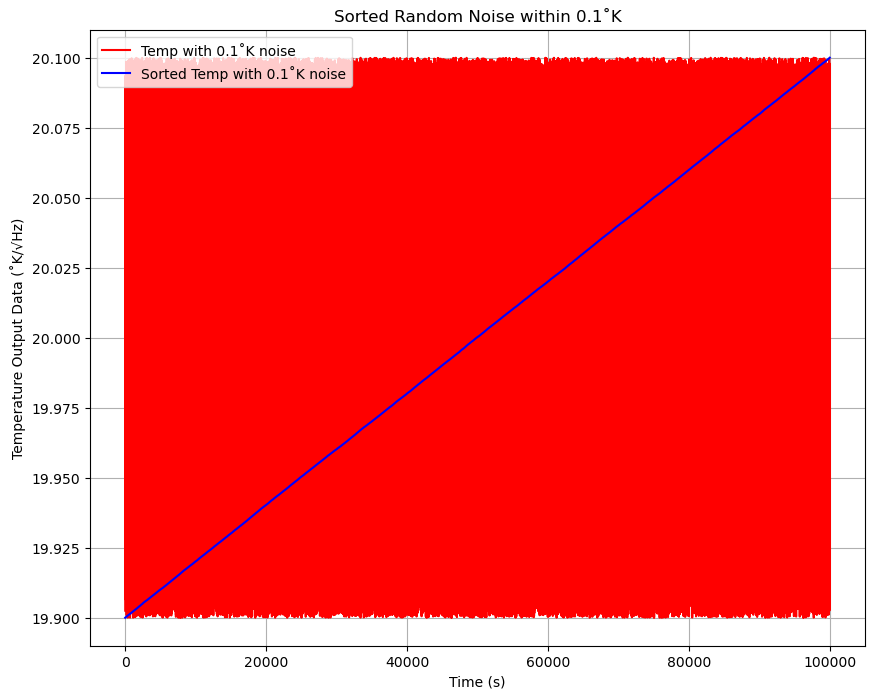

In [271]:
#Sort 0.1K Random Dist data
ABp1K = np.abs(data_p1K)
SHp1K = np.sort(ABp1K)
plt.figure(figsize=(10,8))
plt.plot(time_s, ABp1K, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, SHp1K, 'b-',label = "Sorted Temp with 0.1˚K noise")
plt.title("Sorted Random Noise within 0.1˚K")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.grid('on')
plt.legend()

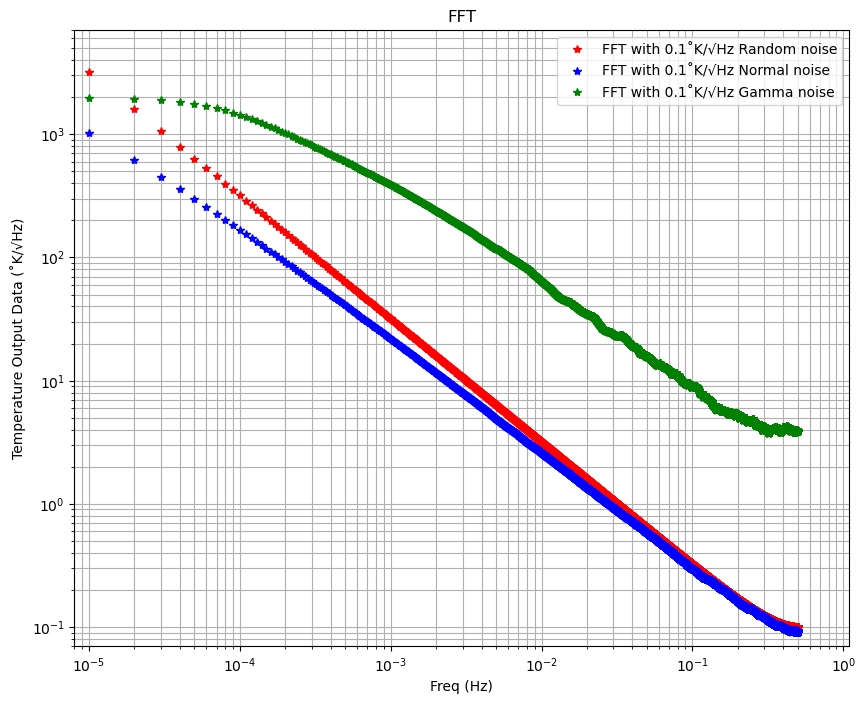

In [272]:
spectrum_p1K = np.fft.fft(SHp1K)
spectrum_Np1K = np.fft.fft(ShNp1K)
spectrum_Gp1K = np.fft.fft(ShGp1K)
freq_p1K = np.fft.fftfreq(len(spectrum_p1K)) 
freq_Np1K = np.fft.fftfreq(len(spectrum_Np1K))
freq_Gp1K = np.fft.fftfreq(len(spectrum_Gp1K))
plt.figure(figsize=(10,8))
plt.plot(freq_p1K, abs(spectrum_p1K), 'r*',label = "FFT with 0.1˚K/√Hz Random noise")
plt.plot(freq_Np1K, abs(spectrum_Np1K), 'b*',label = "FFT with 0.1˚K/√Hz Normal noise")
plt.plot(freq_Gp1K, abs(spectrum_Gp1K), 'g*',label = "FFT with 0.1˚K/√Hz Gamma noise")  
plt.yscale("log")
plt.xscale("log")
plt.xlim(8e-6, 1.1)
plt.ylim(7e-2, 7e3)
plt.title("FFT")
plt.xlabel("Freq (Hz)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()